In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler,Normalizer
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import  roc_curve,auc
from sklearn.metrics import RocCurveDisplay

# Keşifsel Veri Analizi(EDA)

In [3]:
df = pd. read_csv("")
#İlgili kütüphanelerimi yüklüyorum.

In [ ]:
df.shape #Veri setimdedi kolon ve satır sayılarına bakarım

(1599, 12)

In [ ]:
df.columns #Kolonlarıma bakarım

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info() #Data type larını kontrol ederim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.head(10) #İlk 10 satıra bakarım.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
df.nunique() #Burada varsa kategorik datalara bakarım.

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [ ]:
df.isnull().sum() #Eksik dataları kontrol ederim.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

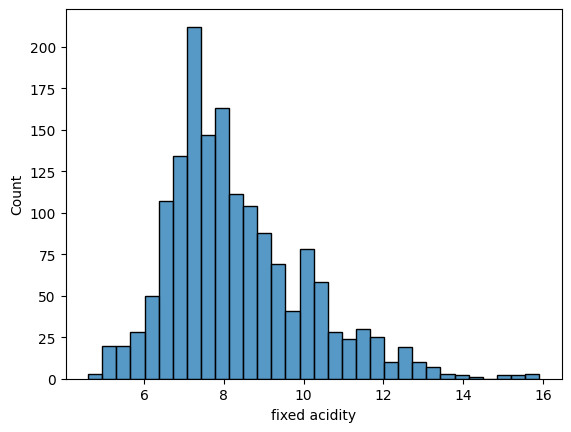

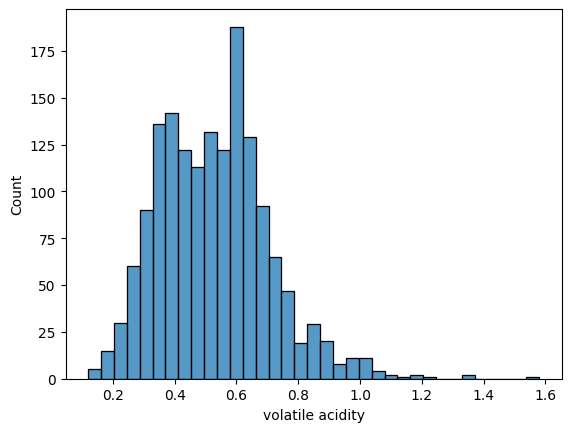

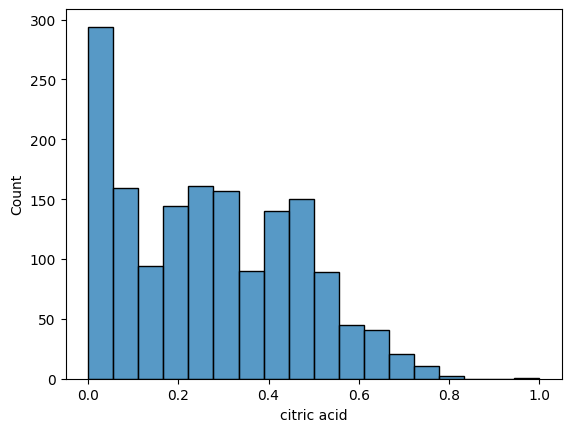

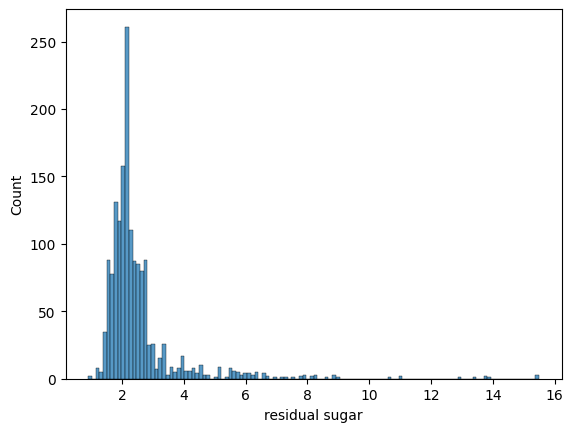

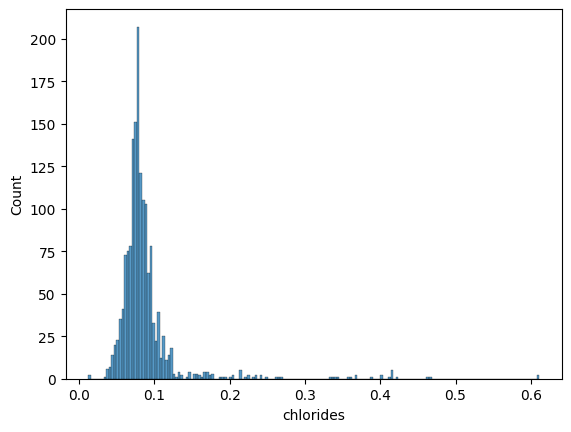

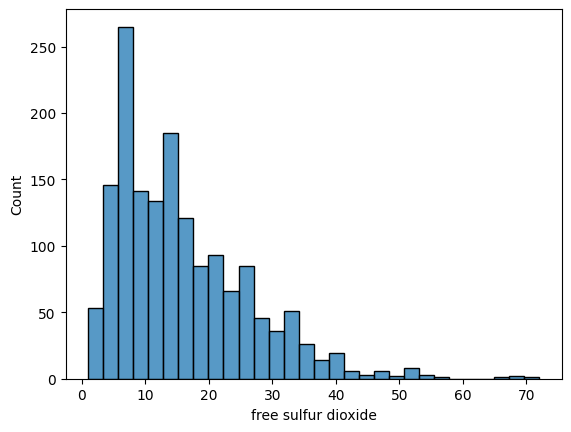

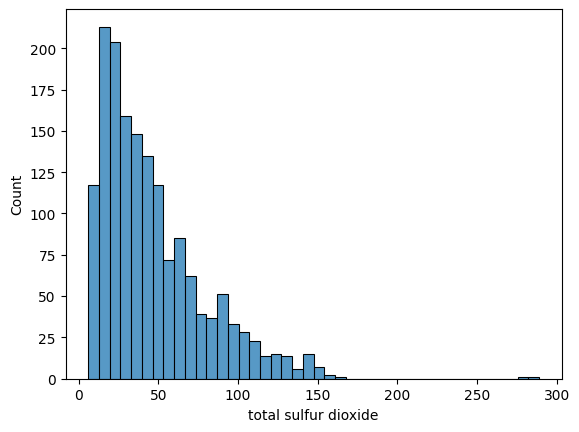

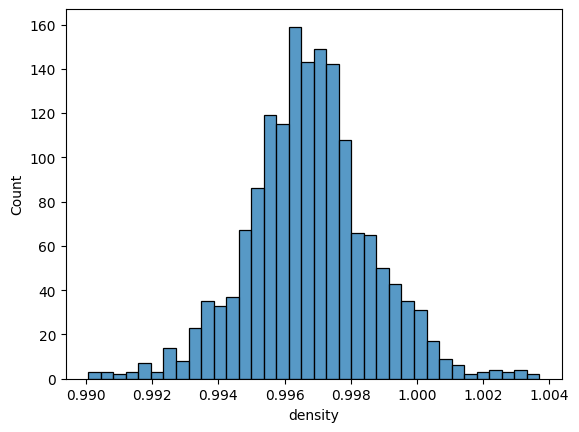

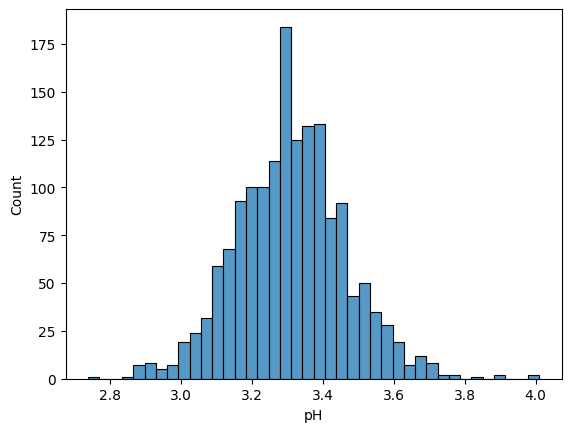

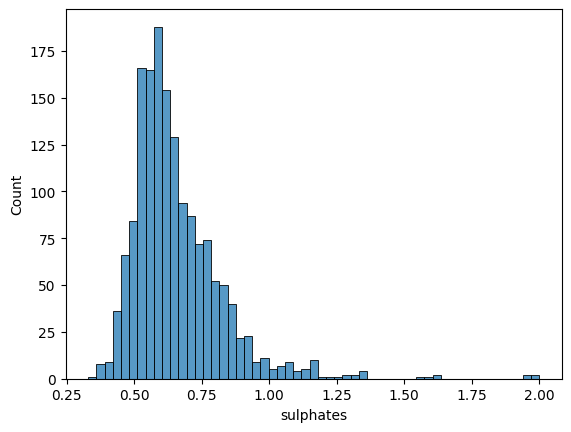

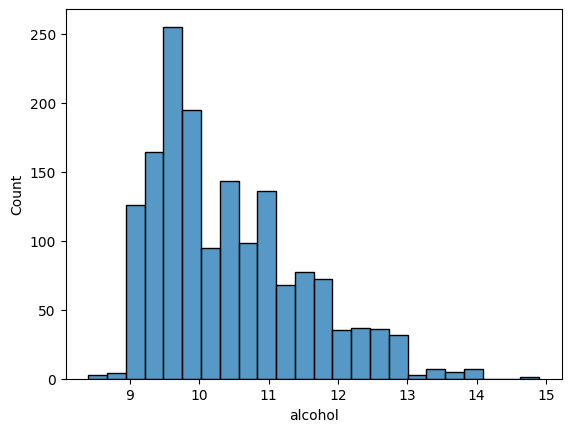

In [ ]:
#Numerik değişkenleri histogramla gösteririm.
for col in num_col:
  sns.histplot(x=df[col])
  plt.show()

In [ ]:
df.columns #kolonları gösteririm.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#Qualityde kaç adet değişken olduğuna bakarız.
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

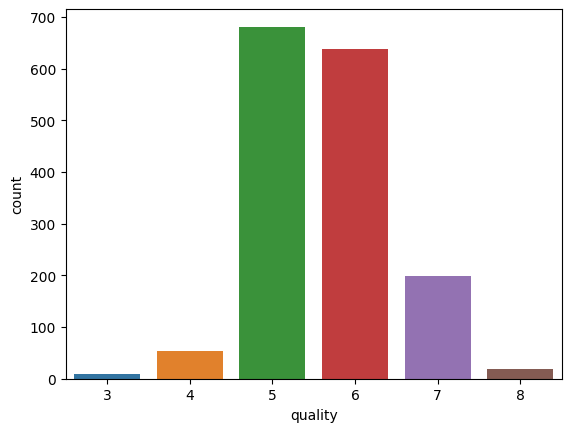

In [ ]:
#Kategorik değişkeni Grafiğe dökerim.
sns.countplot(x=df["quality"],data=df)
plt.show(block=True)

# Aykırı Gözlem Analizi

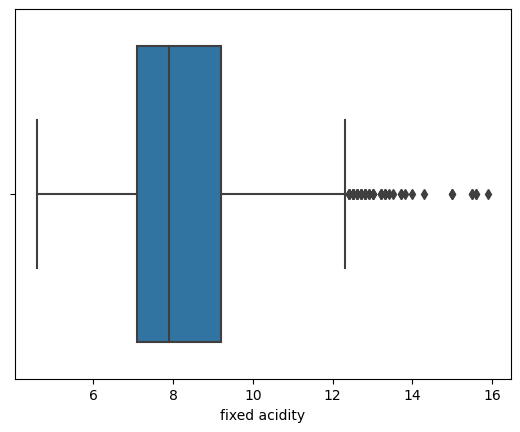

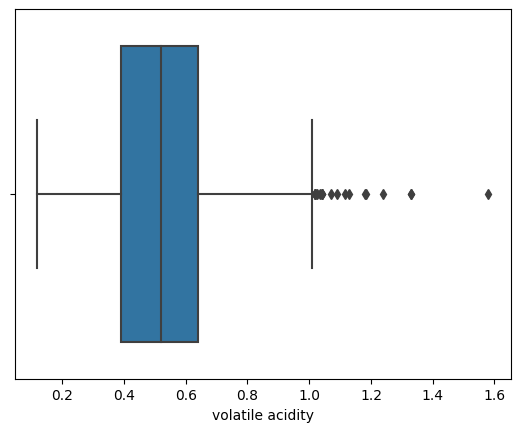

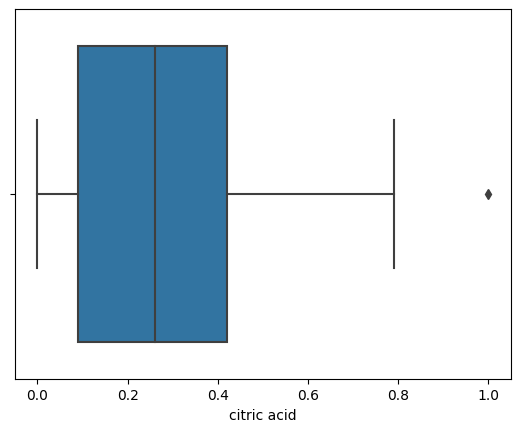

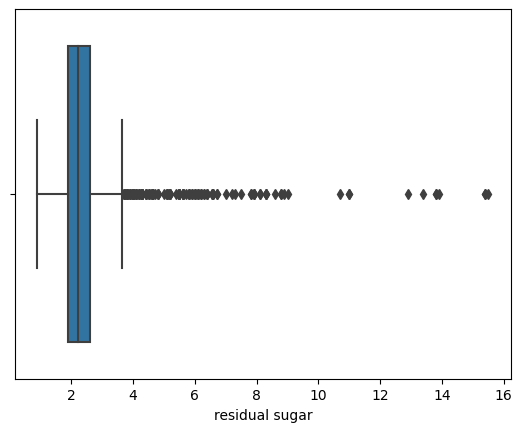

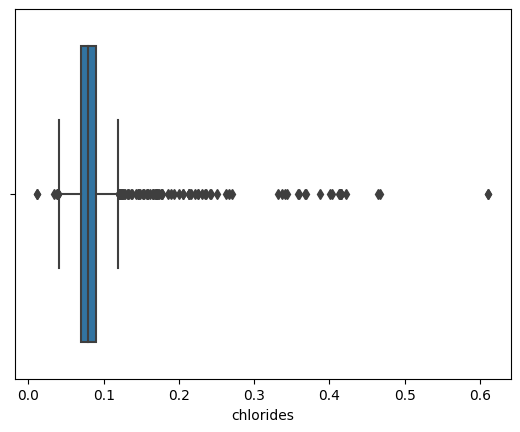

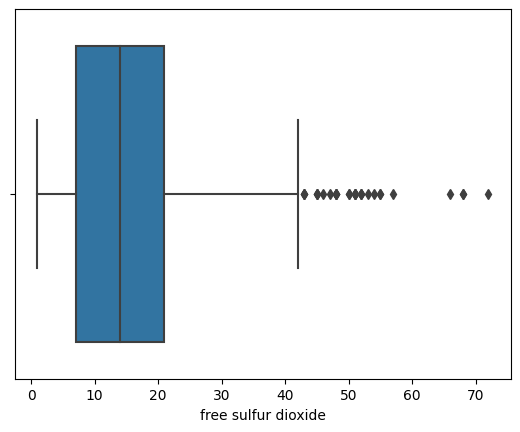

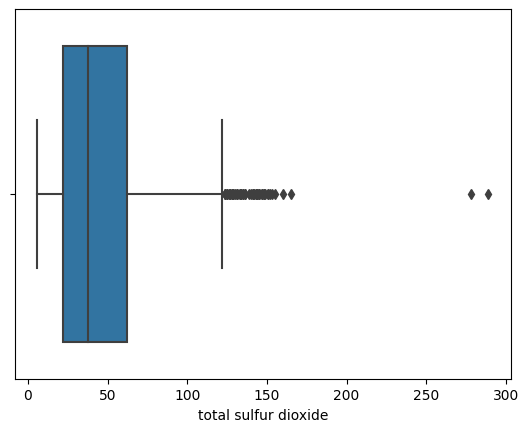

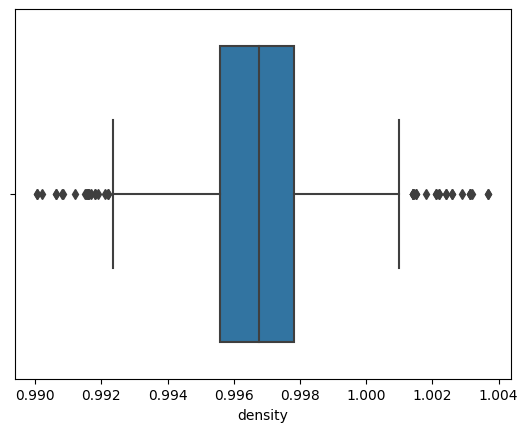

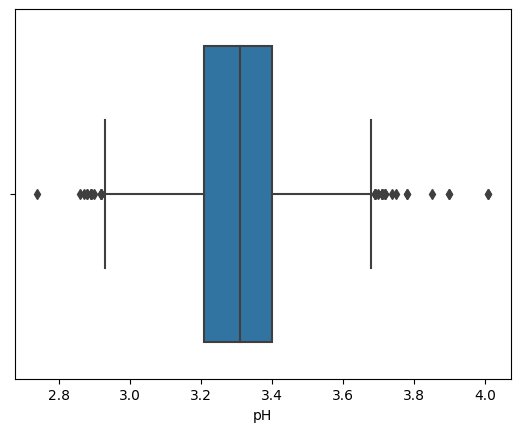

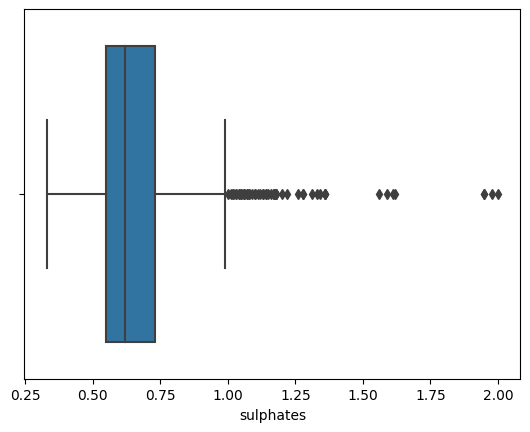

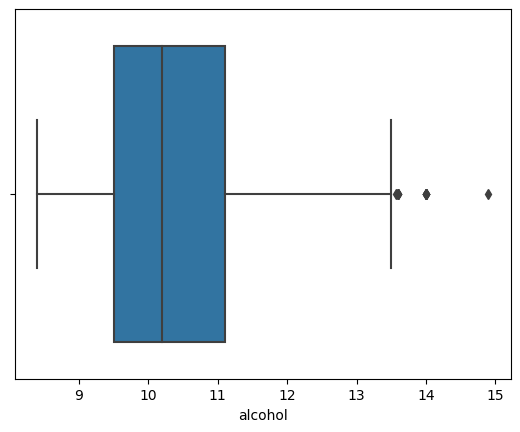

In [ ]:
#Aykırı gözlemleri görmek için ise boxplotu tercih ederim.
for col in num_col:
  sns.boxplot(x=df[col])
  plt.show()

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1) #q1 i hesapla
    quartile3 = dataframe[col_name].quantile(q3) #q3 ü hesapla
    interquantile_range = quartile3 - quartile1 #iqr ın hesaplanması
    up_limit = quartile3 + 1.5 * interquantile_range #üst limit
    low_limit = quartile1 - 1.5 * interquantile_range #alt limit
    return low_limit, up_limit #alt ve üst limitleri return ettik

In [ ]:
low,up=outlier_thresholds(df, "chlorides", q1=0.25, q3=0.75)


In [ ]:
df[(df["chlorides"] < low) | (df["chlorides"] > up)] #Aykırı değerleri görmek için bakarım.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1476,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1490,7.1,0.22,0.49,1.8,0.039,8.0,18.0,0.99344,3.39,0.56,12.4,6
1558,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


In [ ]:
df.shape

(1599, 12)

In [ ]:
df["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [ ]:
#Feature üretmek için acaba belli bir değer arlığı verilebilir mi diye kontrol ettim.
df[df["quality"]==3].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#İyi bir şarapla kötü bir şarabı ayıran özellikleri belirlemek için iki değeri karşılaştırırım.
for col in df.columns:
  print(f'{col}:',df.loc[df["quality"]==3,col].agg({col:"min"}))
  print(f'{col}:',df.loc[df["quality"]==3,col].agg({col:"max"}))


fixed acidity: fixed acidity    6.7
Name: fixed acidity, dtype: float64
fixed acidity: fixed acidity    11.6
Name: fixed acidity, dtype: float64
volatile acidity: volatile acidity    0.44
Name: volatile acidity, dtype: float64
volatile acidity: volatile acidity    1.58
Name: volatile acidity, dtype: float64
citric acid: citric acid    0.0
Name: citric acid, dtype: float64
citric acid: citric acid    0.66
Name: citric acid, dtype: float64
residual sugar: residual sugar    1.2
Name: residual sugar, dtype: float64
residual sugar: residual sugar    5.7
Name: residual sugar, dtype: float64
chlorides: chlorides    0.061
Name: chlorides, dtype: float64
chlorides: chlorides    0.267
Name: chlorides, dtype: float64
free sulfur dioxide: free sulfur dioxide    3.0
Name: free sulfur dioxide, dtype: float64
free sulfur dioxide: free sulfur dioxide    34.0
Name: free sulfur dioxide, dtype: float64
total sulfur dioxide: total sulfur dioxide    9.0
Name: total sulfur dioxide, dtype: float64
total sulf

In [ ]:
df[df["quality"]==7].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7


In [ ]:
for col in df.columns:
  print(f'{col}:',df.loc[df["quality"]==7,col].agg({col:"min"}))
  print(f'{col}:',df.loc[df["quality"]==7,col].agg({col:"max"}))


fixed acidity: fixed acidity    4.9
Name: fixed acidity, dtype: float64
fixed acidity: fixed acidity    15.6
Name: fixed acidity, dtype: float64
volatile acidity: volatile acidity    0.12
Name: volatile acidity, dtype: float64
volatile acidity: volatile acidity    0.915
Name: volatile acidity, dtype: float64
citric acid: citric acid    0.0
Name: citric acid, dtype: float64
citric acid: citric acid    0.76
Name: citric acid, dtype: float64
residual sugar: residual sugar    1.2
Name: residual sugar, dtype: float64
residual sugar: residual sugar    8.9
Name: residual sugar, dtype: float64
chlorides: chlorides    0.012
Name: chlorides, dtype: float64
chlorides: chlorides    0.358
Name: chlorides, dtype: float64
free sulfur dioxide: free sulfur dioxide    3.0
Name: free sulfur dioxide, dtype: float64
free sulfur dioxide: free sulfur dioxide    54.0
Name: free sulfur dioxide, dtype: float64
total sulfur dioxide: total sulfur dioxide    7.0
Name: total sulfur dioxide, dtype: float64
total sul

In [ ]:
#Hangi korelasyon metoduna seçeceğime karar vermek için

In [ ]:
#Standart sapmayı ve ortalamalarını control ederim.
for col in df2.columns:
  print(f"mean of {col}:",df[col].mean())
  print(f"standart devaiation of {col}:",df[col].std(),"\n\n\n")

mean of fixed acidity: 8.31963727329581
standart devaiation of fixed acidity: 1.7410963181276953 



mean of volatile acidity: 0.5278205128205128
standart devaiation of volatile acidity: 0.17905970415353537 



mean of citric acid: 0.2709756097560976
standart devaiation of citric acid: 0.19480113740531857 



mean of residual sugar: 2.53880550343965
standart devaiation of residual sugar: 1.4099280595072798 



mean of chlorides: 0.08746654158849279
standart devaiation of chlorides: 0.0470653020100901 



mean of free sulfur dioxide: 15.874921826141339
standart devaiation of free sulfur dioxide: 10.460156969809725 



mean of total sulfur dioxide: 46.46779237023139
standart devaiation of total sulfur dioxide: 32.895324478299074 



mean of density: 0.9967466791744841
standart devaiation of density: 0.0018873339538425554 



mean of pH: 3.3111131957473416
standart devaiation of pH: 0.15438646490354277 



mean of sulphates: 0.6581488430268917
standart devaiation of sulphates: 0.169506979

In [ ]:
aykiri_deger_listesi=list(df2.columns) #Aykiri değer listesine kolonları veririm


In [ ]:
Q1 = df2[aykiri_deger_listesi].quantile(0.25)
Q3 = df2[aykiri_deger_listesi].quantile(0.75)
IQR=Q3-Q1
max = Q3 + (1.5*IQR) #Minimum Eşik değeri belirleriz
min = Q1-(1.5*IQR)  #Maksimum eşik değeri belirleriz



In [ ]:
min


fixed acidity            3.95000
volatile acidity         0.01500
citric acid             -0.42000
residual sugar           0.85000
chlorides                0.03850
free sulfur dioxide    -14.00000
total sulfur dioxide   -39.50000
density                  0.99227
pH                       2.92500
sulphates                0.28000
alcohol                  7.10000
quality                  3.50000
dtype: float64

In [ ]:
max

fixed acidity            12.35000
volatile acidity          1.01500
citric acid               0.94000
residual sugar            3.65000
chlorides                 0.12250
free sulfur dioxide      42.00000
total sulfur dioxide    124.50000
density                   1.00115
pH                        3.68500
sulphates                 1.00000
alcohol                  13.50000
quality                   7.50000
dtype: float64

In [ ]:
min=list(min)
max=list(max)

In [ ]:
#minimum değerin altında olan aykırı değerleri kontrol ederim.
for col in range(len(aykiri_deger_listesi)):
  print(f"ilgili kolon: {aykiri_deger_listesi[col]},min value:{min[col]} \n\n",df2[df2[aykiri_deger_listesi[col]]<min[col]],"\n\n",f"Aykırı değer adedi:{df2[df2[aykiri_deger_listesi[col]]<min[col]].count()} ","\n\n")

ilgili kolon: fixed acidity,min value:3.95 

 Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: [] 

 Aykırı değer adedi:fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64  


ilgili kolon: volatile acidity,min value:0.015000000000000013 

 Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: [] 

 Aykırı değer adedi:fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               

In [ ]:
#Maksimum değer eşiğinin üstündekileri de kontrol ederim
for col in range(len(aykiri_deger_listesi)):
  print(f"ilgili kolon: {aykiri_deger_listesi[col]},min value:{min[col]} \n\n",df2[df2[aykiri_deger_listesi[col]]>max[col]],f"Aykırı değer adedi:{df2[df2[aykiri_deger_listesi[col]]>max[col]].count()} ","\n\n")

ilgili kolon: fixed acidity,min value:3.95 

       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
205            12.8             0.300         0.74             2.6      0.095   
243            15.0             0.210         0.44             2.2      0.075   
264            12.5             0.560         0.49             2.4      0.064   
294            13.3             0.340         0.52             3.2      0.094   
328            13.4             0.270         0.62             2.6      0.082   
338            12.4             0.490         0.58             3.0      0.103   
339            12.5             0.280         0.54             2.3      0.082   
347            13.8             0.490         0.67             3.0      0.093   
353            13.5             0.530         0.79             4.8      0.120   
359            12.6             0.380         0.66             2.6      0.088   
363            12.5             0.460         0.63             

In [ ]:
#Bu sefer aykırı değerleri ikili özellklere göre belirlemeye çalışırım.
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20) #Komşu sayısını 20 yaparım
clf.fit_predict(df) #Modeli eğitirim

df_scores = clf.negative_outlier_factor_ #outliner factörleri tutmak için kullanılır
df_scores


array([-1.0229416 , -1.01029552, -1.00840592, ..., -1.07759674,
       -1.07848627, -1.02984068])

In [ ]:
df_scores = -df_scores #Birden fazla değere göre aykırı olan değerlerin uzaklıklarına bakarak analiz yaparım.Buna göre 3.değerden sonraki değerler arasında komşuluk varken 3. değerden sonrasında komşuluk yoktur.
np.sort(df_scores)[:300] #Yani 3. değer ve öncesi aykırı değer olmaktadır.

array([-8.89725913, -8.26870781, -3.30716299, -2.46103655, -2.0333711 ,
       -2.0333711 , -1.99379558, -1.99379558, -1.91358613, -1.89297064,
       -1.81782571, -1.81537365, -1.79786982, -1.75359424, -1.74261125,
       -1.66197688, -1.65578565, -1.62450101, -1.62199401, -1.61165844,
       -1.60519465, -1.58367781, -1.58367781, -1.57692057, -1.56441607,
       -1.55456076, -1.55456076, -1.52046579, -1.51592218, -1.51526476,
       -1.51526476, -1.49476166, -1.49476166, -1.4843319 , -1.47823582,
       -1.45269877, -1.44984277, -1.44734469, -1.44605098, -1.44547314,
       -1.4377024 , -1.43239719, -1.43239719, -1.43162785, -1.42546867,
       -1.42072338, -1.42072338, -1.41567943, -1.41567943, -1.41411834,
       -1.39782044, -1.38480284, -1.38480284, -1.38372736, -1.38286762,
       -1.38270325, -1.38169972, -1.38035225, -1.37494874, -1.36975017,
       -1.3629877 , -1.35976262, -1.35769207, -1.34744147, -1.34744147,
       -1.34096577, -1.33630978, -1.33223709, -1.33216247, -1.33

In [ ]:

scores = pd.DataFrame(np.sort(df_scores))  #aykırı değerleri görselleştiririm
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

NameError: name 'df_scores' is not defined

In [ ]:
#Bunun Sonucunda Bu değerlerin kalmasının en mantıklı karar olduğu sonucuna vardım. Eğer bu değerler çıkartılırsa veri setinin çeşitliliği azalacağı için underfitting olma olasılığı fazla olacaktır.

In [ ]:
#Varyans ve Normal dağılımın olup olmadığı kontrol edilir ona göre korelasyon modeli seçilir.

# Testler

In [ ]:
from scipy.stats import shapiro #Normallik testi uygulayarak hangi korelasyon modeli seçeceğime karar veririm.

In [ ]:
for i in num_col:
  statistic,p_value=shapiro(df[i])
  print(f"{i}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value))

fixed acidity: Test statstic=0.9420,p_value=0.0000
volatile acidity: Test statstic=0.9743,p_value=0.0000
citric acid: Test statstic=0.9553,p_value=0.0000
residual sugar: Test statstic=0.5661,p_value=0.0000
chlorides: Test statstic=0.4842,p_value=0.0000
free sulfur dioxide: Test statstic=0.9018,p_value=0.0000
total sulfur dioxide: Test statstic=0.8732,p_value=0.0000
density: Test statstic=0.9909,p_value=0.0000
pH: Test statstic=0.9935,p_value=0.0000
sulphates: Test statstic=0.8330,p_value=0.0000
alcohol: Test statstic=0.9288,p_value=0.0000


In [ ]:
from scipy.stats import jarque_bera #Veri setinin büyüklüğüne göre bu testi de uygularım.

In [ ]:

for col in num_col:
  statistic,result=jarque_bera(df[col])
  print(f"{col}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value)) #p değeri 0.05 değerinden düşük geldiği için dağılımın normal olduğunu reddedemeyiz.

fixed acidity: Test statstic=341.2037,p_value=0.0000
volatile acidity: Test statstic=218.8096,p_value=0.0000
citric acid: Test statstic=68.5665,p_value=0.0000
residual sugar: Test statstic=59693.2726,p_value=0.0000
chlorides: Test statstic=123780.0354,p_value=0.0000
free sulfur dioxide: Test statstic=686.1097,p_value=0.0000
total sulfur dioxide: Test statstic=1570.0745,p_value=0.0000
density: Test statstic=58.6553,p_value=0.0000
pH: Test statstic=52.6901,p_value=0.0000
sulphates: Test statstic=10657.9502,p_value=0.0000
alcohol: Test statstic=199.6635,p_value=0.0000


In [ ]:
df2.corr(method="spearman") #Teste göre spearman korelasyon metriğini uygularım.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.278282,0.661708,0.220701,0.250904,-0.175137,-0.088417,0.623071,-0.706674,0.212654,-0.066576,0.114084
volatile acidity,-0.278282,1.000000,-0.610259,0.032386,0.158770,0.021163,0.094110,0.025014,0.233572,-0.325584,-0.224932,-0.380647
citric acid,0.661708,-0.610259,1.000000,0.176417,0.112577,-0.076452,0.009400,0.352285,-0.548026,0.331074,0.096456,0.213481
residual sugar,0.220701,0.032386,0.176417,1.000000,0.212959,0.074618,0.145375,0.422266,-0.089971,0.038332,0.116548,0.032048
chlorides,0.250904,0.158770,0.112577,0.212959,1.000000,0.000805,0.130033,0.411390,-0.234361,0.020825,-0.284504,-0.189922
free sulfur dioxide,-0.175137,0.021163,-0.076452,0.074618,0.000805,1.000000,0.789698,-0.041178,0.115679,0.045862,-0.081367,-0.056901
total sulfur dioxide,-0.088417,0.094110,0.009400,0.145375,0.130033,0.789698,1.000000,0.129332,-0.009841,-0.000504,-0.257806,-0.196735
density,0.623071,0.025014,0.352285,0.422266,0.411390,-0.041178,0.129332,1.000000,-0.312055,0.161478,-0.462445,-0.177074
pH,-0.706674,0.233572,-0.548026,-0.089971,-0.234361,0.115679,-0.009841,-0.312055,1.000000,-0.080306,0.179932,-0.043672
sulphates,0.212654,-0.325584,0.331074,0.038332,0.020825,0.045862,-0.000504,0.161478,-0.080306,1.000000,0.207330,0.377060


<Axes: title={'center': 'Correlation matrix for Wine Quality'}>

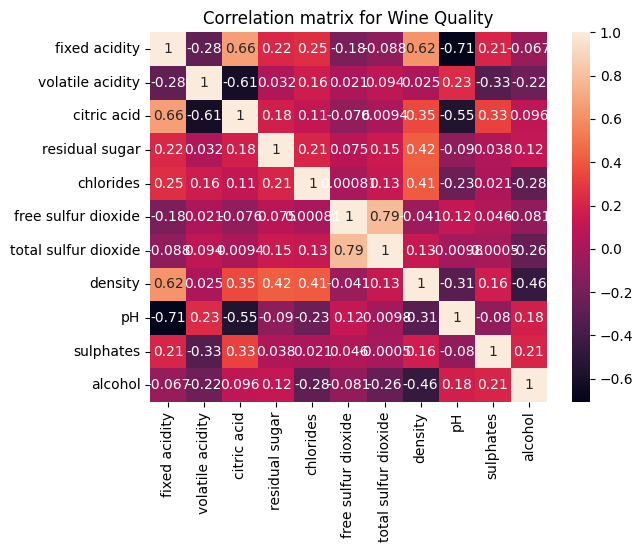

In [ ]:

correlation_matrix=df[num_col].corr(method="spearman")

plt.title("Correlation matrix for Wine Quality")

plt.xlabel("Wine features")

plt.ylabel("Wine features")

sns.heatmap(correlation_matrix,annot=True)

# Aykırı Değerlerin Görselleştirilmesi

In [ ]:
th = np.sort(df_scores)[3] #3.değeri treshold olarak seçtim elimizdeki data setinde başka senaryoda değişir

df[df_scores < th] #tresholddan küçük olan değerleri getir

df[df_scores < th].shape #tresholddan küçük olan değerleri getir shape ile de gözlemleriz


df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

df[df_scores < th].index #çok değişkenli aykırılıkların index bilgilerini yakalayabilirim

Index([480, 1079, 1081], dtype='int64')

In [ ]:
df[df_scores < th] #Bunları görselleştiririm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
480,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1079,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7


In [ ]:
for med in df.columns:
  print(f'{med}:',df[med].median()) #Medyan değerleriyle karşılaştırdığımda bu değerlerden düşük çıktı ancak kalite bazı yerlerde vasat bazı verilerde çok iyi bazı veride ise kötü olduğu için bu verileri çıkartmamın doğru olduğunu düşünmüyorum.

fixed acidity: 7.9
volatile acidity: 0.52
citric acid: 0.26
residual sugar: 2.2
chlorides: 0.079
free sulfur dioxide: 14.0
total sulfur dioxide: 38.0
density: 0.99675
pH: 3.31
sulphates: 0.62
alcohol: 10.2
quality: 6.0


# Feature Engineering

In [ ]:
#standartizasyon işlemleri yapmadan önce anlamlı bulduğum korelasyonlar üzerinden bir feature engineering yapacağım.

In [ ]:
'''Ekleyeceğim featurelar;
citric acid/fixed acidity,
citric acid/ph,
citric acid/volatile acidity,
density/fixed acidity,
fixed acidity/ph,
free sulfur dioxide/total sulfur dioxide'''


In [ ]:
pd.options.mode.copy_on_write = True #Kopya olarak oluşturduğum dataframe üzeridnde değişiklik yapabilmek için True derim.

In [ ]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'ca/fa', 'ca/ph', 'd/fa',
       'fa/ph', 'fsd/tsd', 'va/ca', 'va/s', 'va/fa', 's/ca', 's/al', 's/fa',
       'a/cl', 'a/d', 'a/ph', 'standart_scaler_ca/fa', 'Standart_scaler_ca/ph',
       'Standart_scaler_va/ca', 'Standart_scaler_s/ca', 'Standart_scaler_d/fa',
       'Standart_scaler_fa/ph', 'Standart_scaler_fsd/tsd',
       'Standart_scaler_va/s', 'Standart_scaler_va/fa', 'Standart_scaler_s/al',
       'Standart_scaler_s/fa', 'Standart_scaler_a/cl', 'Standart_scaler_a/d',
       'Standart_scaler_a/ph', 'Encoded_fixed acidity',
       'Encoded_volatile acidity', 'Encoded_citric acid',
       'Encoded_residual sugar', 'Encoded_chlorides',
       'Encoded_free sulfur dioxide', 'Encoded_total sulfur dioxide',
       'Encoded_density', 'Encoded_pH', 'Encoded_sulphates',
       'Encoded_al

In [ ]:
#Feature eklemek için bir de çarpma yöntemini deneyelim.Bunun sonucunda accuracy değerleri LR:0.51,RR:0.54,DT:0.45,NB:0.45,NN:0.49 En kötü sonuçları bu şekilde aldım diyebilir.
'''df2.loc[:,"ca/fa"] = df2["citric acid"] * df2["fixed acidity"]
df2.loc[:,"ca/ph"] = df2["citric acid"] * df2["pH"]
df2.loc[:,"d/fa"] = df2["density"] * df2["fixed acidity"]
df2.loc[:,"fa/ph"] = df2["fixed acidity"] * df2["pH"]
df2.loc[:,"fsd/tsd"] = df2['free sulfur dioxide'] * df2["total sulfur dioxide"]
df2.loc[:,"va/ca"] = df2["volatile acidity"] * df2["citric acid"]
df2.loc[:,"va/s"] = df2["volatile acidity"] * df2["sulphates"]
df2.loc[:,"va/fa"] = df2["volatile acidity"] * df2["fixed acidity"]
df2.loc[:,"s/ca"] = df2["sulphates"] * df2["citric acid"]
df2.loc[:,"s/al"] = df2["sulphates"] * df2["alcohol"]
df2.loc[:,"s/fa"] = df2["sulphates"] * df2["fixed acidity"]
df2.loc[:,"a/cl"] = df2["alcohol"] * df2["chlorides"]
df2.loc[:,"a/d"] = df2["alcohol"] * df2["density"]
df2.loc[:,"a/ph"] = df2["alcohol"] * df2["sulphates"]'''

'df2.loc[:,"ca/fa"] = df2["citric acid"] * df2["fixed acidity"]\ndf2.loc[:,"ca/ph"] = df2["citric acid"] * df2["pH"]\ndf2.loc[:,"d/fa"] = df2["density"] * df2["fixed acidity"]\ndf2.loc[:,"fa/ph"] = df2["fixed acidity"] * df2["pH"]\ndf2.loc[:,"fsd/tsd"] = df2[\'free sulfur dioxide\'] * df2["total sulfur dioxide"]\ndf2.loc[:,"va/ca"] = df2["volatile acidity"] * df2["citric acid"]\ndf2.loc[:,"va/s"] = df2["volatile acidity"] * df2["sulphates"]\ndf2.loc[:,"va/fa"] = df2["volatile acidity"] * df2["fixed acidity"]\ndf2.loc[:,"s/ca"] = df2["sulphates"] * df2["citric acid"]\ndf2.loc[:,"s/al"] = df2["sulphates"] * df2["alcohol"]\ndf2.loc[:,"s/fa"] = df2["sulphates"] * df2["fixed acidity"]\ndf2.loc[:,"a/cl"] = df2["alcohol"] * df2["chlorides"]\ndf2.loc[:,"a/d"] = df2["alcohol"] * df2["density"]\ndf2.loc[:,"a/ph"] = df2["alcohol"] * df2["sulphates"]'

In [ ]:
'''df2.loc[:,"ca/fa"] = df2["citric acid"] / df2["fixed acidity"]
df2.loc[:,"ca/ph"] = df2["citric acid"] / df2["pH"]
df2.loc[:,"d/fa"] = df2["density"] / df2["fixed acidity"]
df2.loc[:,"fa/ph"] = df2["fixed acidity"] / df2["pH"]
df2.loc[:,"fsd/tsd"] = df2['free sulfur dioxide'] / df2["total sulfur dioxide"]'''

In [ ]:
'''Ekstradan volatile acidity/citric acit,volatile acidity/sulphates,volatile acidity/ifixed acidity,
 ın sulpahtes/citric acid,sulpahtes/alcohol,sulpahtes/fixed acidity,
alcohol/clohoride,alcohol/density,alcohol/pH özelliklerini de ekleriz.""

In [ ]:
df2.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'ca/fa', 'ca/ph', 'd/fa',
       'fa/ph', 'fsd/tsd'],
      dtype='object')

In [ ]:
'''df2.loc[:,"va/ca"] = df2["volatile acidity"] / df2["citric acid"]
df2.loc[:,"va/s"] = df2["volatile acidity"] / df2["sulphates"]
df2.loc[:,"va/fa"] = df2["volatile acidity"] / df2["fixed acidity"]
df2.loc[:,"s/ca"] = df2["sulphates"] / df2["citric acid"]
df2.loc[:,"s/al"] = df2["sulphates"] / df2["alcohol"]
df2.loc[:,"s/fa"] = df2["sulphates"] / df2["fixed acidity"]
df2.loc[:,"a/cl"] = df2["alcohol"] / df2["chlorides"]
df2.loc[:,"a/d"] = df2["alcohol"] / df2["density"]
df2.loc[:,"a/ph"] = df2["alcohol"] / df2["sulphates"]'''

In [ ]:
'''#Normallik testlerini bu sefer yeni feature lar için yaparım.
for i in df2.columns:
  statistic,p_value=shapiro(df2[i])
  print(f"{i}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value))'''

fixed acidity: Test statstic=0.9468,p_value=0.0000
volatile acidity: Test statstic=0.9702,p_value=0.0000
citric acid: Test statstic=0.9555,p_value=0.0000
residual sugar: Test statstic=0.5767,p_value=0.0000
chlorides: Test statstic=0.4845,p_value=0.0000
free sulfur dioxide: Test statstic=0.9032,p_value=0.0000
total sulfur dioxide: Test statstic=0.8717,p_value=0.0000
density: Test statstic=0.9924,p_value=0.0000
pH: Test statstic=0.9927,p_value=0.0000
sulphates: Test statstic=0.8302,p_value=0.0000
alcohol: Test statstic=0.9268,p_value=0.0000
quality: Test statstic=0.8640,p_value=0.0000
va_cut: Test statstic=1.0000,p_value=1.0000
ca/fa: Test statstic=0.9599,p_value=0.0000
ca/ph: Test statstic=0.9535,p_value=0.0000
d/fa: Test statstic=0.9910,p_value=0.0000
fa/ph: Test statstic=0.9461,p_value=0.0000
fsd/tsd: Test statstic=0.9838,p_value=0.0000
va/ca: Test statstic=nan,p_value=1.0000
va/s: Test statstic=0.9312,p_value=0.0000
va/fa: Test statstic=0.9582,p_value=0.0000
s/ca: Test statstic=nan,p

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
'''from scipy.stats import jarque_bera
for col in df2.columns:
  statistic,result=jarque_bera(df2[col])
  print(f"{col}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value))'''

fixed acidity: Test statstic=261.5474,p_value=0.0000
volatile acidity: Test statstic=207.2980,p_value=0.0000
citric acid: Test statstic=57.4806,p_value=0.0000
residual sugar: Test statstic=53128.6635,p_value=0.0000
chlorides: Test statstic=90680.4232,p_value=0.0000
free sulfur dioxide: Test statstic=540.4337,p_value=0.0000
total sulfur dioxide: Test statstic=1452.6817,p_value=0.0000
density: Test statstic=38.8250,p_value=0.0000
pH: Test statstic=55.2386,p_value=0.0000
sulphates: Test statstic=8231.7250,p_value=0.0000
alcohol: Test statstic=168.4438,p_value=0.0000
quality: Test statstic=14.7059,p_value=0.0000


ValueError: data type <class 'numpy.object_'> not inexact

In [ ]:
'''#Bu sefer yeni oluşturduğum feature ların diğer özelliklerle olan corelasyonuna bakarım.
pd.set_option('display.max_columns', None)
quality=dict(df2.corr(method="spearman").iloc[11,:])#Korelasyon katsayısını ağırlık olarak kullanırım.
df2.corr(method="spearman")'''

# Sentetik Veri Ekleme

In [ ]:
sentetik_df=pd.read_csv() #Chatgpt ile üretmiş olduğum sentetik veriyi okuturum.

In [ ]:
sentetik_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.62,0.05,2.3,0.079,8,39.0,0.99780,3.43,0.57,9.6,5
1,6.9,0.52,0.04,2.1,0.068,6,14.0,0.99550,3.39,0.64,9.4,6
2,7.5,0.49,0.20,2.6,0.332,8,14.0,0.99680,3.21,0.90,10.5,6
3,7.8,0.59,0.18,2.3,0.076,17,54.0,0.99750,3.43,0.59,10.0,5
4,8.8,0.66,0.26,1.7,0.074,4,23.0,0.99710,3.15,0.74,9.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,6.4,0.49,0.00,2.4,0.083,14,31.0,0.99680,3.55,0.51,9.5,5
1130,7.0,0.53,0.06,2.0,0.081,10,19.0,0.99550,3.37,0.60,9.7,6
1131,6.3,0.67,0.48,1.4,0.055,5,27.0,0.99385,3.62,0.61,11.0,6
1132,7.2,0.39,0.32,1.8,0.065,34,60.0,0.99685,3.34,0.52,9.5,5


In [ ]:
#Gerçek verilerimizle yapay verilerimizi birleştiririz.
yeni_df=pd.concat([df,sentetik_df],axis=0)

In [ ]:
yeni_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,6.4,0.49,0.00,2.4,0.083,14.0,31.0,0.99680,3.55,0.51,9.5,5
1130,7.0,0.53,0.06,2.0,0.081,10.0,19.0,0.99550,3.37,0.60,9.7,6
1131,6.3,0.67,0.48,1.4,0.055,5.0,27.0,0.99385,3.62,0.61,11.0,6
1132,7.2,0.39,0.32,1.8,0.065,34.0,60.0,0.99685,3.34,0.52,9.5,5


In [4]:
# YZ modellerinin kütüphanelerini yükleriz.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [5]:
#infinit değerler NaN değerleriyle değiştirilir.
yeni_df.replace([np.inf, -np.inf], np.nan, inplace=True)

NameError: name 'yeni_df' is not defined

In [ ]:
yeni_df.dropna(inplace=True)

In [ ]:
y=yeni_df["quality"] #hedef değişken belirleriz

In [ ]:
y[y<6]="kotu" #6 nın altında olan değerlere "kotu" üstünde olanlara ise "iyi" olarak kategorik değişken belirttim.
y[y!="kotu"]="iyi"

<ipython-input-11-14be17267868>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y<6]="kotu" #6 nın altında olan değerlere "kotu" üstünde olanlara ise "iyi" olarak belirttim.


In [ ]:
le=LabelEncoder()
y=le.fit_transform(y) #Encode ederiz


In [ ]:
#Encode u tersine çeviririm.
for i in range(len(y)):
    if y[i] == 1:  # "kötü" label
        y[i] = 0
    elif y[i] == 0:  # "iyi" label
        y[i] = 1

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
X=yeni_df.drop(columns="quality") #hedef değişken haricinde bağımsız değişkenleri ayırırız

In [ ]:
mms = MinMaxScaler()
X=mms.fit_transform(X) #Bağımsız değişkenleri scale ederim.

In [ ]:
#Veri setini test ve eğitim seti olucak şekilde ikiye ayırırız.
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20)

In [ ]:
#  LogisticRegression() yapılır.
LR =LogisticRegression()

# RidgeClassifier() yapılır.
RC=RidgeClassifier()


#  DecisionTreeClassifier yapılır.
DT = DecisionTreeClassifier()

#  GaussianNB() yapılır.
GNB = GaussianNB()

#  MLPClassifier() modeli yapılır.
MLPC=MLPClassifier()

#KNN modeli yapılır.
KNN=KMeans(n_clusters=2)

In [ ]:
#  Logistic Classifier modelini eğitiriz.
LR_trained =LR.fit(X_train,y_train)

#Ridge Classifier modelini eğitiriz.
RC_trained = RC.fit(X_train,y_train)


#  Decision Tree modelini eğitiriz.
DT_trained = DT.fit(X_train,y_train)

# Naive Bayes modelini eğitiriz.
GNB_trained = GNB.fit(X_train,y_train)

# Neural Network modelini eğitiriz.
MLPC = MLPC.fit(X_train,y_train)

#KNN modelini eğitiriz.
KNN_trained=KNN.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#  Logistic Classifier modelinde tahminde bulunuruz.
LR_predict=LR.predict(X_test)

# Ridge Classifier modelinde tahminde bulunuruz.
RC_predict = RC.predict(X_test)

#  Decision Tree modelinde tahminde bulunuruz.
DT_predict=DT.predict(X_test)

#  Naive Bayes modelinde tahminde bulunuruz.
GNB_predict = DT.predict(X_test)

# Neural Network modelinde tahminde bulunuruz.
MLPC_predict = MLPC.predict(X_test)

#KNN i tahminleriz.
KNN_predict = KNN.predict(X_test)

In [ ]:
#   Logistic Classifier modeli için  Classification Report u oluştururuz.
LR_CR = classification_report(LR_predict,y_test)

# Ridge Classifier modeli için  Classification Report u oluştururuz.
RC_CR = classification_report(RC_predict,y_test)

# Decision Tree modeli için  Classification Report u oluştururuz.
DT_CR = classification_report(DT_predict,y_test)

# Naive Bayes modeli için  Classification Report u oluştururuz.
GNB_CR=classification_report(GNB_predict,y_test)

#  Neural Network modeli için  Classification Report u oluştururuz.
MLPC_CR=classification_report(MLPC_predict,y_test)

#KNN Classification Report oluştururuz.
KNN_CR=classification_report(KNN_predict,y_test)

In [ ]:
#Bütün modeller için rapor oluşturuz.

print("*****LOGISTIC REGRESSION *****")
print(LR_CR)


print("*****RIDGE REGRESSION *****")
print(RC_CR)


print("*****DECISION TREE *****")
print(DT_CR)


print("*****NAIVE BAYES *****")
print(GNB_CR)


print("*****NEURAL NETWORK *****")
print(MLPC_CR)

print("*****KNN *****")
print(KNN_CR)

*****LOGISTIC REGRESSION *****
              precision    recall  f1-score   support

           0       0.80      0.73      0.76       296
           1       0.71      0.79      0.75       251

    accuracy                           0.76       547
   macro avg       0.76      0.76      0.75       547
weighted avg       0.76      0.76      0.76       547

*****RIDGE REGRESSION *****
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       294
           1       0.71      0.78      0.74       253

    accuracy                           0.75       547
   macro avg       0.75      0.75      0.75       547
weighted avg       0.75      0.75      0.75       547

*****DECISION TREE *****
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       260
           1       0.87      0.84      0.86       287

    accuracy                           0.85       547
   macro avg       0.85      0.85      0.85 

In [ ]:
#Sonuçlara bağlı olarak en yüksek değeri Decision Tree sağlamıştır.ML modeli olarak Decision Tree ile devam edeceğim.

# Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import  roc_curve,auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate

In [ ]:
cv_results = cross_validate(DT_trained,
                            X, y,
                            cv=500,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"]) #


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
cv_results["test_accuracy"].mean() #Accuracy score unu 500 katlı CV bulmuş oluruz.Bu denemeyi ne kadar yükseltirsem yükselteyim sonu değişmedi.

0.8458666666666667

# Grid Search CV

In [7]:
from sklearn.model_selection import GridSearchCV #hyper parametre optimizasyonu için Grid Search CV yi denerim.


In [6]:
param_grid = {
    'criterion': ['gini', 'entropy'], #Her parametre için bir sözlük listesi oluştururum.
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'random_state': [42]  # Her seferinde aynı sonuçları almak için random_state sabitlendi
} #Parametreleri ayrı bir değişkene atarım.

In [ ]:
clf_GS = GridSearchCV( DT,param_grid) #GridSearch CV yi bir değişkene atarım ve ilgili değişkenleri eklerim.
clf_GS.fit(X, y)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10], 'random_state': [42],
                         'splitter': ['best', 'random']})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Splitter:', clf_GS.best_estimator_.get_params()['splitter'])
print('Max Depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('min_samples_split:',clf_GS.best_estimator_.get_params()['min_samples_split'])
print('max_features:',clf_GS.best_estimator_.get_params()['max_features'])
print('max_leaf_nodes:',clf_GS.best_estimator_.get_params()['max_leaf_nodes'])


NameError: name 'clf_GS' is not defined

# Modelin Tekrar Eğitilmesi

In [ ]:
DT = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=20,min_samples_split=2) #GridSearch CV den çıkan sonuçlara göre parametreleri güncellerim.

In [ ]:
DT_trained = DT.fit(X_train,y_train)

In [ ]:
DT_predict=DT.predict(X_test)

In [ ]:
DT_CR = classification_report(DT_predict,y_test)

In [ ]:
print("*****DECISION TREE *****")
print(DT_CR)

*****DECISION TREE *****
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       256
           1       0.87      0.84      0.85       291

    accuracy                           0.85       547
   macro avg       0.85      0.85      0.85       547
weighted avg       0.85      0.85      0.85       547



# Veri setinin Tekrar Değerlendirilmesi

In [8]:
from imblearn.over_sampling import SMOTE #Veri seti dengesiz olduğu için yeni veri seti üretmek için SMOTE u kullanırız.

In [9]:
#infinit değerler NaN değerleriyle değiştirilir.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

y=df["quality"] #hedef değişken belirleriz.

X=df.drop(columns="quality") #hedef değişken haricinde bağımsız değişkenleri ayırırız.




In [10]:
smote = SMOTE(sampling_strategy="minority",k_neighbors=3, n_jobs=1,random_state=42)#Veri seti dengesiz olduğu için özellikle kalite söz konusu olduğunda kalite değeri 3,4 ve 8 olan değerlerin düşük olduğunu gözlemledim.
X_resampled, y_resampled = smote.fit_resample(X, y)#Bu nedenle sampling strategy olarak "minority" rastlantının fazla olması için ise k_neighbors ı 2 olarak belirledim.

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
X_resampled.head(10) #Bunun sonucunda sampling sayısını orjinal verilerle minority sayısı arttırılacak şekilde güncellerim.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [ ]:
X.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [11]:
from imblearn.over_sampling import ADASYN #Veri setini arttırmak ve çeşitlilik katmak için yapay veri üretimini ADASYN ile yaparım.

In [12]:
adasyn = ADASYN(sampling_strategy="minority",random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X_resampled, y_resampled)#Tekrar Oversampling yaparım.Bu sefer minority üzerinde etkili olduğu için bu model üzerinden ilerlerim.

In [ ]:
X_resampled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000
...,...,...,...,...,...,...,...,...,...,...,...
2925,7.292003,0.370800,0.305400,1.907997,0.064280,15.920029,26.699927,0.994476,3.234600,0.732399,11.346001
2926,7.244031,0.375597,0.307798,1.955969,0.059963,15.440309,27.899227,0.994603,3.232202,0.746791,11.322015
2927,7.453490,0.379257,0.304279,1.874886,0.074214,16.037174,23.251136,0.993993,3.235721,0.702140,11.581867
2928,7.247794,0.375221,0.307610,1.952206,0.060301,15.477944,27.805140,0.994593,3.232390,0.745662,11.323897


In [13]:
df2=pd.concat([X_resampled, y_resampled],axis=1) #iki yapay verisetiyle ürettiğim gerçek veriyi bir araya getiririm.

<Axes: >

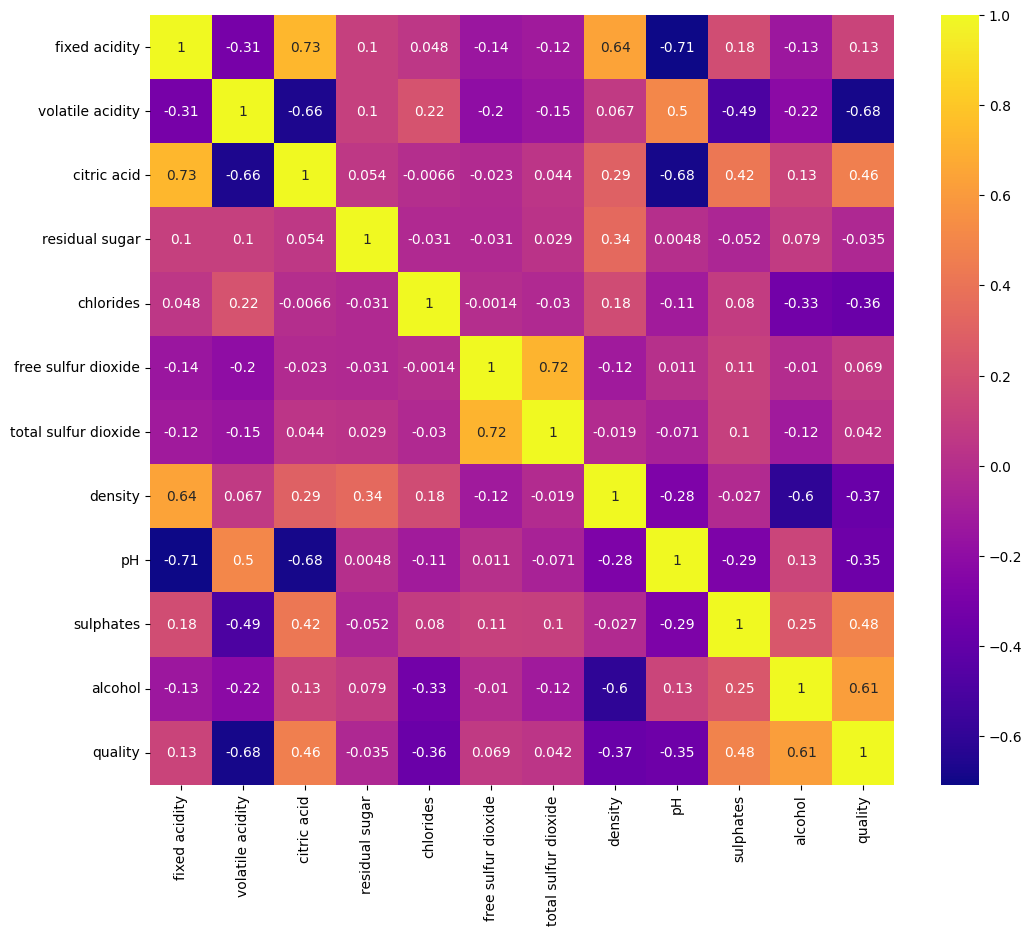

In [ ]:
plt.figure(figsize=(12,10)) #Sample size ımız arttığı için korelasyon matrisimizde etkili olan değerleri daha iyi görebiliyoruz.
sns.heatmap(df2.corr(), annot=True, cmap=plt.cm.plasma)

<Axes: xlabel='quality', ylabel='alcohol'>

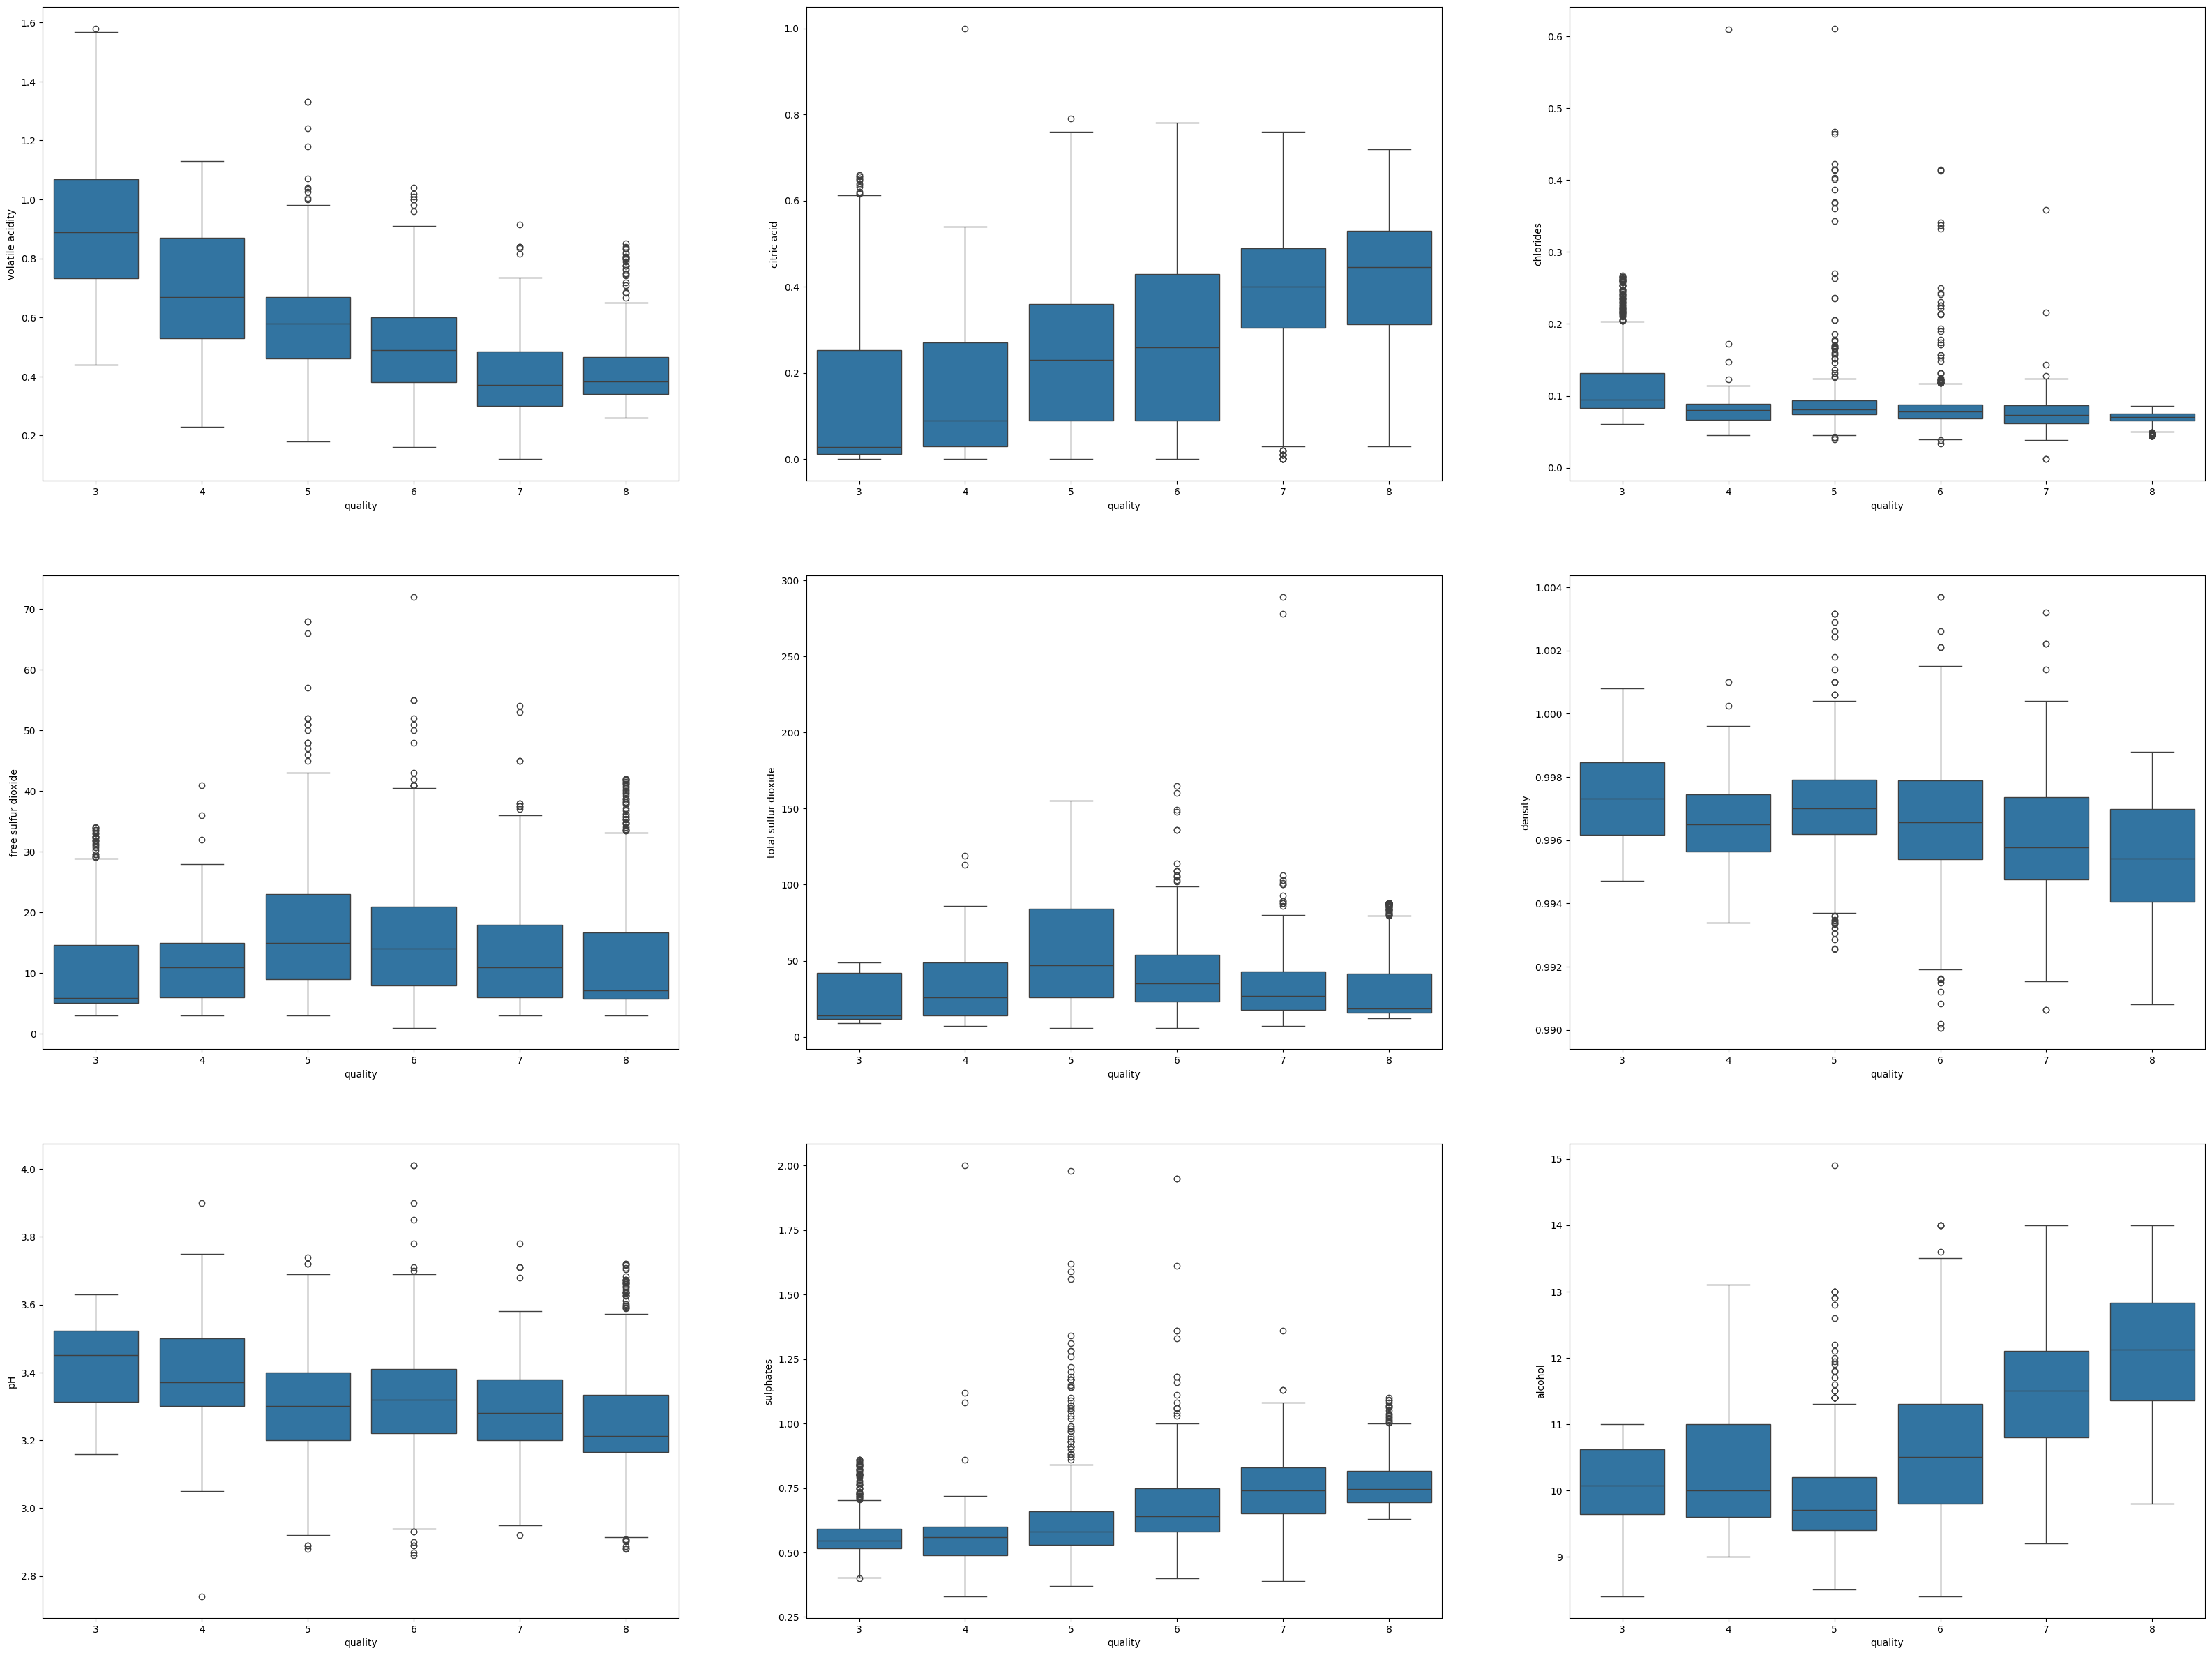

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (40, 30))#Aykırı değerleri şaraptaki diğer etmenlerle karşılaştırırım.
sns.boxplot(ax = axes[0, 0], x = 'quality' ,y = 'volatile acidity', data = df2);

sns.boxplot(ax = axes[0, 1], x = 'quality' ,y = 'citric acid', data = df2);

sns.boxplot(ax = axes[0, 2], x = 'quality' ,y = 'chlorides', data = df2);

sns.boxplot(ax = axes[1, 0], x = 'quality' ,y = 'free sulfur dioxide', data = df2);

sns.boxplot(ax = axes[1, 1], x = 'quality' ,y = 'total sulfur dioxide', data = df2);

sns.boxplot(ax = axes[1, 2], x = 'quality' ,y = 'density', data = df2);

sns.boxplot(ax = axes[2, 0], x = 'quality' ,y = 'pH', data = df2);

sns.boxplot(ax = axes[2, 1], x = 'quality' ,y = 'sulphates', data = df2);

sns.boxplot(ax = axes[2, 2], x = 'quality' ,y = 'alcohol', data = df2)

In [14]:
selected_columns=['fixed acidity'] #En düşük korelasyona sahip olduğu için fixed acidity değerini atılacak kolon olarak belirlerim.

In [15]:
def remove_outliers(data, column): #Outlierları belirleyebilmek için alt ve üst limit oluştururum.
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    alt_limit = Q1 - 1.5 * IQR
    ust_limit = Q3 + 1.5 * IQR
    return data[(data[column] >= alt_limit) & (data[column] <= ust_limit)]


columns_to_remove_outliers = selected_columns
for col in columns_to_remove_outliers:
    df2 = remove_outliers(df, col)


df2 = df2.dropna()
df2.reset_index(drop=True, inplace=True)

In [16]:
X=X_resampled #Sentetik veriyle karışım yaptığım verileri hedef ve bağımsız değişkenler olucak şekilde yeniden tanımlarım
y=y_resampled

In [17]:

mms = MinMaxScaler()
X=mms.fit_transform(X) #Bağımsız değişkenleri scale ederim.

y[y<=6]="kotu" #6 a eşit altında olan değerlere "kotu" üstünde olanlara ise "iyi" olarak kategorik değişken belirttim.
y[y!="kotu"]="iyi"

le=LabelEncoder()
y=le.fit_transform(y) #Encode ederiz.
#Encode u tersine çeviririm.
for i in range(len(y)):
    if y[i] == 1:  # "kötü" label
        y[i] = 0
    elif y[i] == 0:  # "iyi" label
        y[i] = 1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=42)

In [19]:
DT = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=20,min_samples_split=2)


In [20]:
DT_trained = DT.fit(X_train,y_train)
DT_predict=DT.predict(X_test)
DT_CR = classification_report(DT_predict,y_test)
print("*****DECISION TREE *****")
print(DT_CR)


*****DECISION TREE *****
              precision    recall  f1-score   support

         iyi       0.87      0.85      0.86       181
        kotu       0.93      0.94      0.94       405

    accuracy                           0.91       586
   macro avg       0.90      0.90      0.90       586
weighted avg       0.91      0.91      0.91       586



# Cross Validation-2

In [ ]:
#Bir önceki değere göre parametreleri belirlediğim için tekrar cross validation yaparım.

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'], #Her parametre için bir sözlük listesi oluştururum.
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'random_state': [42]  # Her seferinde aynı sonuçları almak için random_state sabitlendi
} #Parametreleri ayrı bir değişkene atarım.

clf_GS = GridSearchCV( DT,param_grid)
clf_GS.fit(X, y)

print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Splitter:', clf_GS.best_estimator_.get_params()['splitter'])
print('Max Depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('min_samples_split:',clf_GS.best_estimator_.get_params()['min_samples_split'])
print('max_features:',clf_GS.best_estimator_.get_params()['max_features'])
print('max_leaf_nodes:',clf_GS.best_estimator_.get_params()['max_leaf_nodes'])


Görüntülenen çıkış son 5000 satıra kısaltıldı.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features

Best Criterion: gini
Splitter: best
Max Depth: 5
min_samples_split: 2
max_features: None
max_leaf_nodes: 10


In [22]:
DT = DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=5,min_samples_split=2,max_leaf_nodes=10)#yeni parametreleri yerleştiririm ve modelimin tekrar eğitirim.

DT_trained = DT.fit(X_train,y_train)
DT_predict=DT.predict(X_test)
DT_CR = classification_report(DT_predict,y_test)
print("*****DECISION TREE *****")
print(DT_CR)


*****DECISION TREE *****
              precision    recall  f1-score   support

         iyi       0.84      0.91      0.87       164
        kotu       0.96      0.93      0.95       422

    accuracy                           0.93       586
   macro avg       0.90      0.92      0.91       586
weighted avg       0.93      0.93      0.93       586



In [24]:
from sklearn.metrics import confusion_matrix #Buna bağlı olarak Confusion matrixini çıkartırım.
cm = confusion_matrix(y_test, DT_predict)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[149  28]
 [ 15 394]]


In [ ]:
#Buna bağlı olarak en iyi accuracy değerini 0.93 bulurum.